Zalecamy nie czytać notatników na githubie, ze względu na źle wyświetlające się wizualizacje i brak możliwości uruchamiania kodu. Polecamy otworzyć notatnik w google colab, następującym linkiem:

<a target="_blank" href="https://colab.research.google.com/github/OlimpiadaAI/szkolenia/blob/main/01_numpy_wektory_macierze.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
#@title Kod do wizualizacji, nie trzeba go czytać (polecamy zwinąć komórkę)

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# -----------------------
# Visualization Code
# -----------------------

def plot_vector_sum(a, b):
    # Create a figure with arrows for vectors
    plt.figure(figsize=(6, 6))
    plt.grid(True)
    sstr = lambda x: f'({x[0]}, {x[1]})'

    # Plot vectors as arrows
    # Vector v
    plt.quiver(0, 0, *a, angles='xy', scale_units='xy', scale=1, color='r', label=f'a = {sstr(a)}')
    plt.plot(a[0], a[1], 'bo')  # Ending position of vector v as a blue dot
    # Vector w, shifted to the end of vector v
    plt.quiver(*a, *b, angles='xy', scale_units='xy', scale=1, color='r', label=f'b = {sstr(b)}')
    # Ending position of the sum of vectors as a blue dot
    plt.plot(*(a + b), 'bo')
    # Resultant sum of vectors as an arrow
    plt.quiver(0, 0, *(a + b), angles='xy', scale_units='xy', scale=1, color='g', label=f'a + b = {sstr(a + b)}')

    # Set axis limits
    plt.xlim(0, 5)
    plt.ylim(0, 5)

    # Add legend
    plt.legend()

    # Show plot
    plt.show()


# Define a function to plot rotations
def plot_rotations_as_arrows(v, vectors_rotated):
    # Create figure and axes for the animation
    fig, ax = plt.subplots(figsize=(6, 6))

    # Function to update each frame of the animation
    def update(frame):
        ax.clear()
        ax.grid(True)
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        # Original vector
        ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='Original v')
        # Rotated vector
        rotated_v = vectors_rotated[frame]
        ax.quiver(0, 0, rotated_v[0], rotated_v[1], angles='xy', scale_units='xy', scale=1, color='g',
                  label=f'Rotated v by {(frame + 1) * 30}°')
        ax.legend()

    # Initialize the animation
    ani = FuncAnimation(fig, update, frames=len(vectors_rotated), repeat=True)

    # Display the animation as interactive JSHTML
    plt.close(fig)  # This prevents Matplotlib from displaying the static image
    return HTML(ani.to_jshtml())


# Define a function to plot rotations
def plot_rotations_as_points(vectors_rotated):
    # Create figure and axes for the animation
    fig, ax = plt.subplots(figsize=(6, 6))

    # Function to update each frame of the animation
    def update(frame):
        ax.clear()
        ax.grid(True)
        ax.set_xlim(-7, 7)
        ax.set_ylim(-7, 7)
        # Draw the circle
        circle = plt.Circle((2, 2), 1, color='b', fill=False)
        ax.add_artist(circle)
        # Original points
        ax.scatter([2], [2], color='r')
        ax.scatter(vectors_rotated[frame][:, 0], vectors_rotated[frame][:, 1], color='r')
        # Rotated points
        ax.scatter(vectors_rotated[frame][:, 0], vectors_rotated[frame][:, 1], color='g')

    # Initialize the animation
    ani = FuncAnimation(fig, update, frames=len(vectors_rotated), repeat=True)

    # Display the animation as interactive JSHTML
    plt.close(fig)  # This prevents Matplotlib from displaying the static image
    return HTML(ani.to_jshtml())

def animate_transformations(transformed_datasets):
    """Create and display an animation of the transformed datasets."""
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)

    scatter_plot = ax.scatter(transformed_datasets[0][:, 0], transformed_datasets[0][:, 1], color='blue')
    ax.set_title('Animacja skalowania wzdłuż osi x')
    text = ax.text(0.5, -3.5, '', ha='center', va='center', fontsize=12, color='red')

    def update(frame):
        scatter_plot.set_offsets(transformed_datasets[frame])
        return scatter_plot, text,

    ani = FuncAnimation(fig, update, frames=range(len(transformed_datasets)), blit=True, repeat=True)
    plt.close(fig)  # This prevents Matplotlib from displaying the static image
    return HTML(ani.to_jshtml())



# Numpy, wektory, macierze

**Uwaga** Nie wczytuj się w kod służący do wizualizacji. Nie jest on w tym wykładzie prawie w ogóle istotny. 

## Wektory

O wektorach można myśleć na dwa sposoby:

1. Fizycznie: Jako strzałki w przestrzeni, które mają określony kierunek i długość. Przykładem może być sytuacja, kiedy przechodzisz z punktu A do punktu B. Kierunek twojego ruchu oraz przebyta odległość mogą być reprezentowane przez wektor. Jeśli idziesz 5 metrów na wschód, możemy to opisać jako wektor wskazujący na wschód o długości 5 metrów.

2. Matematycznie: Jako ciąg liczb, które określają długość wektora w każdym z wymiarów przestrzeni. Na przykład, wektor (3, 4) w układzie współrzędnych oznacza, że rozpoczynając w punkcie (0,0) – środku układu współrzędnych – przesuwamy się o 3 jednostki w prawo (wzdłuż osi x) i 4 jednostki w górę (wzdłuż osi y). To tworzy wektor kończący się w punkcie (3, 4).

Choć najłatwiej jest wyobrażać sobie wektory w dwuwymiarowej przestrzeni (2D, jak strzałki na kartce) lub w trójwymiarowej (3D, strzałki w przestrzeni), możemy również rozważać wektory w przestrzeniach o dowolnej liczbie wymiarów, jak na przykład ciąg liczb $(1, 3, 1, -1)$.

UWAGA: długość i liczba wymiarów wektora to nie to samo! Np. wektor $(3, 4)$ ma dwa wymiary, ale jego długość to z twierdzenia Pitagorasa $\sqrt{3^2 + 4^2} = 5$.

Wektory są kluczowe w matematyce i fizyce, ponieważ umożliwiają zrozumienie i obliczanie różnorodnych zjawisk w naukach przyrodniczych i technice. Aby pracować z wektorami w Pythonie, używamy biblioteki o nazwie `numpy`, która jest bardzo popularna wśród naukowców i inżynierów. Poniżej przedstawimy, jak możemy zdefiniować wektory i wykonać na nich proste operacje.



### Dodawanie wektorów

Dodawanie wektorów jest równoznaczne z dodaniem ich odpowiednich składowych. Na przykład, suma wektorów `a` i `b` definiowana jest jako:

$$ c = a + b = [a_1 + b_1, a_2 + b_2] $$

W `numpy`, dodawanie wygląda bardzo prosto:


In [2]:
# Definiujemy dwa dwuwymiarowe wektory a i b numpy
a = np.array([1, 2])
b = np.array([3, 1])

In [3]:
c = a + b
print("Wynik dodawania a + b:", c)

Wynik dodawania a + b: [4 3]


Poniżej przedstawimy co się stało na obrazku, używając napisanych przez nas funkcji do wizualizacji:

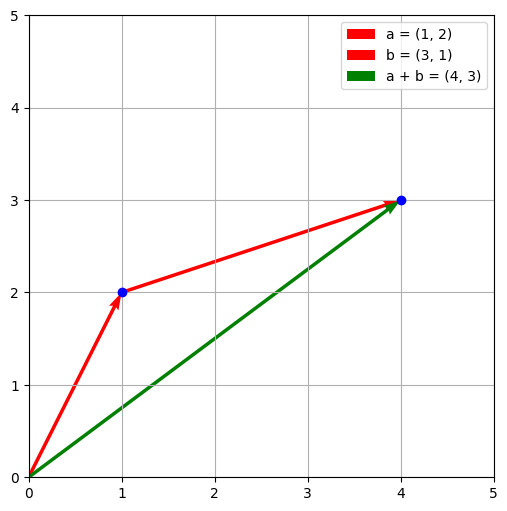

In [4]:
plot_vector_sum(a, b)  # Wizualizujemy sumę wektorów a i b

### Mnożenie wektora przez liczbę

Mnożenie wektora przez liczbę polega na pomnożeniu każdej składowej wektora. Na przykład, jeśli chcemy pomnożyć wektor `a` przez `3`, wynik będzie wyglądał następująco:

$ d = 3 \cdot a = [3 \cdot a_1, 3 \cdot a_2] $

Przykład w `numpy`:


In [5]:
d = 3 * a
print("a =", a)
print("3 * a:", d)

a = [1 2]
3 * a: [3 6]


### Iloczyn skalarny wektorów

Dla dwóch wektorów $\mathbf{a} = (a_1, a_2, a_3)$ i $\mathbf{b} = (b_1, b_2, b_3)$ ich iloczyn skalarny to $\mathbf{a} \cdot \mathbf{b} = a_1 \cdot b_1 + a_2 \cdot b_2 + a_3 \cdot b_3$.

Możemy mnożyć skalarnie tylko dwa wektory o tej samej liczbie wymiarów. Przykład w `numpy`:


In [6]:
a = np.array([1, 2, -1, 3])
b = np.array([-1, 0, 2, 2])

np.dot(a, b)  # upewnij się że rozumiesz skąd się wziął wynik!

3

UWAGA: zobacz co się stanie jeśli po prostu użyjesz operatora `*`:

In [7]:
a * b

array([-1,  0, -2,  6])


# Czym jest macierz?

Macierz to prostokątna tablica liczb. Macierz 2x2, która składa się z elementów $a, b, c, d$, jest zapisywana jako:

$$
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
$$

Oczywiście macierze mogą też mieć inne wymiary:

In [8]:
array_2d = np.array(
  [
    [1,  2,  3,  4,  5 ],
    [6,  7,  8,  9,  10],
    [11, 12, 13, 14, 15]
  ]
)
array_2d

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

Możemy też rozważać tablice o większej **liczbie wymiarów** niż macierz:

In [9]:
array_3d = np.array(
  [
    [
      [1,  2,  3,  4,  5 ],
      [6,  7,  8,  9,  10],
      [11, 12, 13, 14, 15],
    ],
    [
      [16, 17, 18, 19, 20],
      [21, 22, 23, 24, 25],
      [26, 27, 28, 29, 30],
    ]
  ]
)
array_3d

array([[[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15]],

       [[16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25],
        [26, 27, 28, 29, 30]]])

Ich wymiary możesz odczytać za pomocą własności `.shape`:

In [10]:
print(array_2d.shape)
print(array_3d.shape)

(3, 5)
(2, 3, 5)


A do poszczgólnych komórek można się odwoływać za pomocą indeksów (indeksujemy od 0), np:

In [11]:
array_2d[1, 2]  # upewnij się że rozumiesz skąd się wziął wynik!

8


### Mnożenie macierzy przez wektor

Czasem, jeśli wymiary się zgadzają, można "mnożyć" macierze i wektory. Dla macierzy 2x2 $A$ i wektora dwuelementowego $\mathbf{v}$, wzór na tą operację jest taki:

$$
A \mathbf{v} = \begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}
= \begin{pmatrix}
ax + by \\
cx + dy
\end{pmatrix}
$$


In [12]:
print(np.array([[1, 2], [3, 4]]) @ np.array([5, 6]))  # upewnij się że rozumiesz skąd się wziął wynik!

[17 39]


In [13]:
print(np.array([[1, 2, 3], [3, 4, 5]]) @ np.array([5, 6, 7]))  # upewnij się że rozumiesz skąd się wziął wynik!

[38 74]


In [14]:
# print(np.array([[1, 2, 3], [3, 4, 5]]) * np.array([5, 6])) # Błąd, złe kształty!

UWAGA: jeśli napiszesz `A * b` zamiast `A @ b` to stanie się coś innego, sprawdź co!


### Mnożenie macierzy jako transformacje geometryczne

Mnożenie macierzy przez wektor może być interpretowane jako różne transformacje geometryczne:

1. **Obrót** – Macierz obrotu o kąt $\theta$ jest dana przez:
   $$
   \begin{pmatrix}
   \cos \theta & -\sin \theta \\
   \sin \theta & \cos \theta
   \end{pmatrix}
   $$
   Obraca ona wektor o kąt $\theta$ wokół początku układu współrzędnych.

2. **Skalowanie** – Macierz skalująca o współczynniki $s_x$ i $s_y$ wygląda następująco:
   $$
   \begin{pmatrix}
   s_x & 0 \\
   0 & s_y
   \end{pmatrix}
   $$
   Zmienia ona długość wektora wzdłuż osi x i y.


Przykład: macierz obrotu:


In [15]:
# Define the vector v
v = np.array([1, 2])

# Define a rotation matrix for 30 degrees
theta = 30 * math.pi / 180  # Convert degrees to radians
rotation_matrix = np.array([[math.cos(theta), -math.sin(theta)],
                            [math.sin(theta), math.cos(theta)]])

# Plot the rotations
plot_rotations_as_arrows(v, [rotation_matrix @ v])




## Mnożenie macierzy przez macierz

Mnożenie dwóch macierzy polega na:
1. przemnożeniu każdej kolumny drugiej macierzy przez pierwszą macierz (jako mnożenie macierz-wektor) i
2. zapisaniu wyników jako kolumny nowej macierzy.

Jeśli mamy dwie macierze:

$$
A = \begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{bmatrix}
$$

i

$$
B = \begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22} \\
\end{bmatrix}
$$

to ich iloczyn, oznaczany jako $C = A \cdot B$, jest obliczany jako:

$$
C = \begin{bmatrix}
a_{11} \cdot b_{11} + a_{12} \cdot b_{21} & a_{11} \cdot b_{12} + a_{12} \cdot b_{22} \\
a_{21} \cdot b_{11} + a_{22} \cdot b_{21} & a_{21} \cdot b_{12} + a_{22} \cdot b_{22} \\
\end{bmatrix}
$$

Podobnie działa mnożenie większych macierzy: element na pozycji $(i, j)$ w wynikowej macierzy to iloczyn skalarny i-tego wiersza pierwszej macierzy i j-tej kolumny drugiej macierzy.

Pamiętaj jednak, że można pomnożyć ze sobą jedynie niektóre macierze: liczba kolumn pierwszej macierzy musi być równa liczbie wierszy drugiej!

#### Przykład: mnożenie macierzy obrotu
Pokażemy teraz, że pomnożenie dwóch macierzy reprezentujących obrót o kąt $\Theta$ daje znowu macierz obrotu, ale tym razem o kąt $2\Theta$. 

$$
\mathbf{R}(\theta) \times \mathbf{R}(\theta) = \mathbf{R}(2\theta)
$$

Rachunek dla tego wyrażenia wygląda następująco:

$$
\mathbf{R}(\theta) = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta) \\
\end{bmatrix}
$$

Mnożąc tę macierz przez siebie, otrzymujemy:

$$
\mathbf{R}(\theta) \times \mathbf{R}(\theta) = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta) \\
\end{bmatrix} \times \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta) \\
\end{bmatrix}
$$

$$
= \begin{bmatrix}
\cos(\theta)\cos(\theta) - \sin(\theta)\sin(\theta) & -\cos(\theta)\sin(\theta) - \sin(\theta)\cos(\theta) \\
\sin(\theta)\cos(\theta) + \cos(\theta)\sin(\theta) & -\sin(\theta)\sin(\theta) + \cos(\theta)\cos(\theta) \\
\end{bmatrix}
$$

$$
= \begin{bmatrix}
\cos(2\theta) & -\sin(2\theta) \\
\sin(2\theta) & \cos(2\theta) \\
\end{bmatrix}
$$

Zatem $ \mathbf{R}(\theta) \times \mathbf{R}(\theta) = \mathbf{R}(2\theta) $, co oznacza, że dwa kolejne obroty o kąt $ \theta $ dają efekt obrotu o kąt $ 2\theta $. A poniżej przykład:

In [16]:
# Define the vector v
v = np.array([1, 2])

# Define a rotation matrix for 30 degrees
theta = 30 * math.pi / 180  # Convert degrees to radians
rotation_matrix = np.array([[math.cos(theta), -math.sin(theta)],
                            [math.sin(theta), math.cos(theta)]])

# Create an empty list to store rotated vectors
vectors_rotated = []

# Calculate rotated vectors by multiplying the vector v with the rotation matrix repeatedly
for i in range(12):
    v = rotation_matrix @ v  # Multiply the rotation matrix by the vector
    vectors_rotated.append(v)

# Plot the rotations
plot_rotations_as_arrows(v, vectors_rotated)



### Przykład: Mnożenie macierzy jako transformacja wielu wektorow naraz
- **Macierz $ A $ (2x2)**: 
  $$
  A = \begin{bmatrix}
  a & b \\
  c & d
  \end{bmatrix}
  $$

- **Macierz $ B $ ($ n \times 2 $)**: Reprezentuje zbiór $ n $ punktów na płaszczyźnie. Każdy punkt to wiersz w tej macierzy.
  $$
  B = \begin{bmatrix}
  x_1 & y_1 \\
  x_2 & y_2 \\
  \vdots & \vdots \\
  x_n & y_n
  \end{bmatrix}
  $$

Wynikiem mnożenia tych dwóch macierzy będzie macierz $ C $ o wymiarach $ n \times 2 $, gdzie każdy element $ c_{ij} $ jest obliczany jako suma produktów elementów odpowiednich rzędów macierzy $ A $ i kolumn macierzy $ B $:

- **Macierz $ C $ ($ n \times 2 $)**:
  $$
  C = A \cdot B = \begin{bmatrix}
  a x_1 + b y_1 & a x_2 + b y_2 \\
  c x_1 + d y_1 & c x_2 + d y_2 \\
  \vdots & \vdots \\
  a x_n + b y_n & c x_n + d y_n
  \end{bmatrix}
  $$

W każdej komórce nowej macierzy $ C $:
- $ c_{i1} = a x_i + b y_i $
- $ c_{i2} = c x_i + d y_i $

Ta operacja jest niesamowicie przydatna, kiedy chcemy sprawnie transformować cały zbiór punktów:

In [17]:

def generate_circle_points(radius, num_points):
    """Generate points on a circle."""
    theta = np.linspace(0, 2 * np.pi, num_points)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.column_stack((x, y))

def transform_points(points, sx, sy):
    """Transform points by a scaling matrix."""
    transformation_matrix = np.array([[sx, 0], [0, sy]])
    transformed_points = points @ transformation_matrix
    return transformed_points

# Generate initial circle points
radius = 1
num_points = 100
circle_points = generate_circle_points(radius, num_points)

sx_array = np.hstack([np.linspace(0, 3, 10), np.linspace(3, 0, 10)])
# Transform the points with different sx values
transformed_datasets = [transform_points(circle_points, sx, 1) for sx in sx_array]

# Start the animation
animate_transformations(transformed_datasets)


In [18]:
# Define the rotation matrix for 30 degrees
theta = 30 * math.pi / 180  # Convert degrees to radians
rotation_matrix = np.array([[math.cos(theta), -math.sin(theta)],
                            [math.sin(theta), math.cos(theta)]])

# Create an array of angles for evenly distributed points on the circle
angles = np.linspace(0, 2*np.pi, 12, endpoint=False)

# Create an array of original points on the circle
original_points = np.array([[2 + np.cos(angle), 2 + np.sin(angle)] for angle in angles])

# Create an empty list to store rotated points
vectors_rotated = []

# Calculate rotated points by multiplying the original points with the rotation matrix repeatedly
for i in range(12):
    rotated_points = np.dot(original_points, rotation_matrix)  # Multiply the original points by the rotation matrix
    vectors_rotated.append(rotated_points)
    original_points = rotated_points  # Update original points with rotated points for the next iteration

# Plot the rotations
plot_rotations_as_points(vectors_rotated)


# Inne operacje w numpy

In [19]:
np.zeros((2, 3))   # Tworzenie tablicy wypełnionej zerami

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
array = np.array([0,1,2])
print(array.shape)
print(array.reshape(1, -1).shape)  # Dodawanie wymiaru

(3,)
(1, 3)


### Typy danych w numpy

In [21]:
np.array([1, 2, 3, 4, 5], dtype=int)

array([1, 2, 3, 4, 5])

In [22]:
np.array([1, 2, 3, 4, 5], dtype=float)

array([1., 2., 3., 4., 5.])

Po więcej szczegółów i funkcji numpy odsyłamy do https://numpy.org/doc/stable/user/quickstart.html